In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

index=["sepal length ",
"sepal width ",
"petal length", 
"petal width",
"class"]

df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\iris\iris.data",names=index)

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.isnull().sum()

sepal length     0
sepal width      0
petal length     0
petal width      0
class            0
dtype: int64

array([[<Axes: title={'center': 'sepal length '}>,
        <Axes: title={'center': 'sepal width '}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

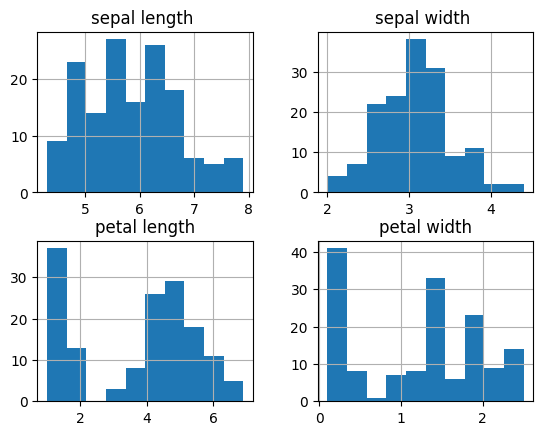

In [5]:
df.hist()

In [8]:
df.columns

Index(['sepal length ', 'sepal width ', 'petal length', 'petal width',
       'class'],
      dtype='object')

In [10]:
df.select_dtypes(include=[np.number]).skew()


sepal length     0.314911
sepal width      0.334053
petal length    -0.274464
petal width     -0.104997
dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)


Label mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [19]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='class'), df['class'], test_size=0.2, random_state=42, stratify=df['class']
)


In [23]:
label_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [24]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
model.score(X_test, y_test)

0.9333333333333333

In [30]:
y_test

38     0
127    2
57     1
93     1
42     0
56     1
22     0
20     0
147    2
84     1
107    2
141    2
104    2
51     1
7      0
49     0
14     0
69     1
63     1
138    2
10     0
140    2
58     1
134    2
132    2
77     1
75     1
18     0
116    2
28     0
Name: class, dtype: int32

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

